In [90]:
print(__doc__)
print("pipelines only transform the observed data X")
print("used to cahin multiple estimators into one")
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
print('built using a list of (key, value) pairs: key=name and value=estimator object')

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
print(pipe)
print('make_pipeline is a shorthand for construction')
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB())
print(make_pipeline)

print('the estimator of a pipeline is stored as a list of steps taht can be accessed with idx')
print(pipe.steps[0])
print(pipe['reduce_dim'])

print('named_steps allows accessing steps by name')
print(pipe.named_steps.reduce_dim is pipe['reduce_dim'])


print('subpipeline extraction')
print(pipe[:1])
print(pipe[-1:])

print('accessing parameters of the estimators useful in doing grid searches')
# nested parameters
print(pipe.set_params(clf__C=10))

print('------------------------------------------')
from sklearn.model_selection import GridSearchCV
param_grid = dict(reduce_dim__n_components=[2,5,10],
                 clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)
print(grid_search)

print('------------------------------------------')
print('ignoring non-final steps')
print('------------------------------------------')
from sklearn.linear_model import LogisticRegression
param_grid = dict(reduce_dim=['pasthrough', PCA(5), PCA(10)],
                 clf=[SVC(), LogisticRegression()],
                 clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)
print(pipe[0])
print(pipe['reduce_dim'])
print('------------------------------------------')




Automatically created module for IPython interactive environment
pipelines only transform the observed data X
used to cahin multiple estimators into one
built using a list of (key, value) pairs: key=name and value=estimator object
Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
make_pipeline is a shorthand for construction
<function make_pipeline at 0x119f4f4d0>
the estimator of a pipeline is stored as a list of steps taht can be 

# Pipeline Anova SVM example

In [28]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print(__doc__)
# data importation 
X, y = make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# anova svm-c
#anova filter, takes 3 best ranked features

anova_filter= SelectKBest(f_regression, k=3)
clf=svm.LinearSVC()

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))
coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

print('subpipeline was utilized to map back the fitted coeff into the original feature space')


Automatically created module for IPython interactive environment
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.67      0.50      0.57         8
           2       0.40      1.00      0.57         2
           3       0.57      0.80      0.67         5

    accuracy                           0.64        25
   macro avg       0.62      0.73      0.63        25
weighted avg       0.70      0.64      0.64        25

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.02634314 -0.36937336  0.          0.          0.         -0.2952007
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.22349716 -0.34702645  0.          0.          0.          0.36521023
   0.          0.        ]
 [ 0.          0.          0.      

# Sample pipeline for text feature extraction and eval

In [49]:
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                   format='%(asctime)s %(levelname)s %(message)s')
categories = [
    'alt.atheism',
    'talk.religion.misc',
]

print("loading the dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d ategories" % len(data.target_names))
print()

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), #unigram or bigram
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}

if __name__ == '__main__':
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
    print('performing grid search')
    print('pipeline:', [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0=time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs" % (time() - t0))
    print()
    
    print("best score: %0.3f" % grid_search.best_score_)
    print("best parameter set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        







Automatically created module for IPython interactive environment
loading the dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 ategories

performing grid search
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   21.8s finished


done in 22.117s

best score: 0.940
best parameter set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	vect__max_df: 0.75
	vect__ngram_range: (1, 1)


# chaining a PCA and a logistic regression

Automatically created module for IPython interactive environment


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


best param (CV sore=0.922):
{'logistic__C': 21.54434690031882, 'pca__n_components': 30}


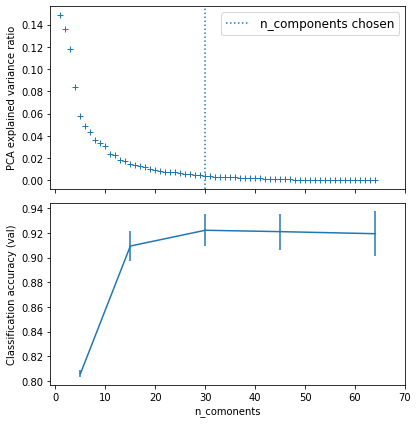

In [54]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol= 0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("best param (CV sore=%0.3f):" % search.best_score_)
print(search.best_params_)

pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6,6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
        pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
              legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_comonents')
plt.xlim(-1, 70)
plt.tight_layout()
plt.show()






# Explicit feature map approximation for RBF kernels

Automatically created module for IPython interactive environment


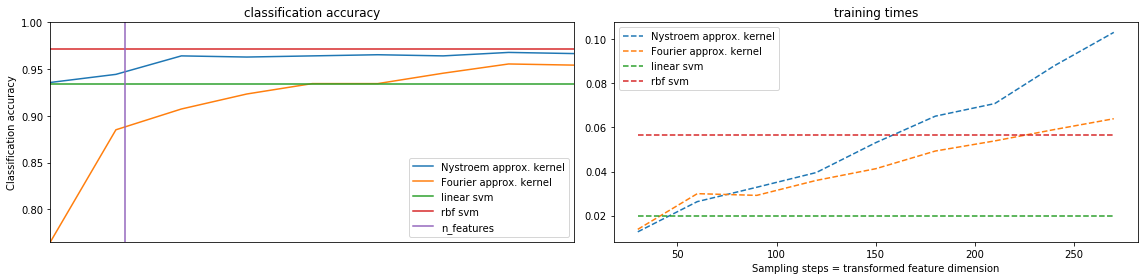


----------------------------------------------------
decision surfaces of RBF kernel svm and linear svm
----------------------------------------------------



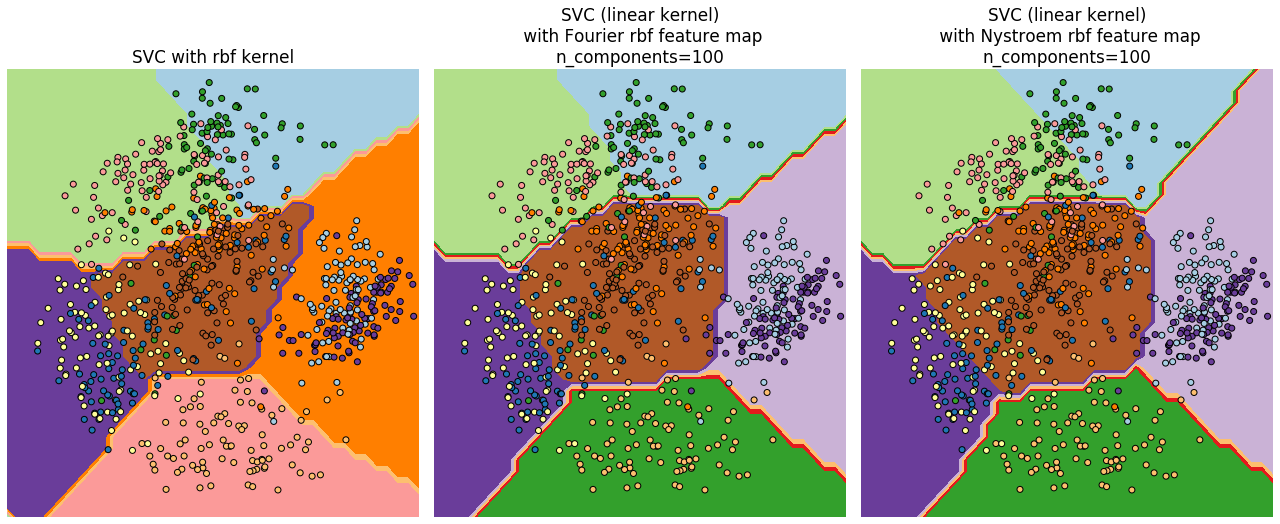

In [80]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                         Nystroem)
from sklearn.decomposition import PCA
digits=datasets.load_digits(n_class=9)

n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

data_train, targets_train = (data[:n_samples // 2],
                            digits.target[:n_samples // 2])
data_test, targets_test = (data[n_samples // 2:],
                          digits.target[n_samples // 2:])
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
feature_map_nystroem= Nystroem(gamma=.2, random_state=1)
fourier_approx_svm= pipeline.Pipeline([("feature_map", feature_map_fourier),
                                      ("svm", svm.LinearSVC())])
nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svm.LinearSVC())])
kernel_svm_time = time()
kernel_svm.fit(data_train, targets_train)
kernel_svm_score = kernel_svm.score(data_test, targets_test)
kernel_svm_time = time() - kernel_svm_time

linear_svm_time = time()
linear_svm.fit(data_train, targets_train)
linear_svm_score = linear_svm.score(data_test, targets_test)
linear_svm_time = time() - linear_svm_time

sample_sizes = 30 * np.arange(1, 10)
fourier_scores= []
nystroem_scores = []
fourier_times = []
nystroem_times = []

for D in sample_sizes:
    fourier_approx_svm.set_params(feature_map__n_components=D)
    nystroem_approx_svm.set_params(feature_map__n_components=D)
    
    start = time()
    nystroem_approx_svm.fit(data_train, targets_train)
    nystroem_times.append(time() - start)
    
    start = time()
    fourier_approx_svm.fit(data_train, targets_train)
    fourier_times.append(time() - start)
    
    fourier_score = fourier_approx_svm.score(data_test, targets_test)
    nystroem_score = nystroem_approx_svm.score(data_test, targets_test)
    nystroem_scores.append(nystroem_score)
    fourier_scores.append(fourier_score)

plt.figure(figsize=(16,4))
accuracy= plt.subplot(121)
timescale=plt.subplot(122)
accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
timescale.plot(sample_sizes, nystroem_times, '--',
              label='Nystroem approx. kernel')
accuracy.plot(sample_sizes, fourier_scores, label="Fourier approx. kernel")
timescale.plot(sample_sizes, fourier_times, '--',
               label='Fourier approx. kernel')
              
# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_score, linear_svm_score], label="linear svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="rbf svm")
timescale.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_time, kernel_svm_time], '--', label="rbf svm")


accuracy.plot([64, 64], [0.7, 1], label="n_features")

accuracy.set_title("classification accuracy")
timescale.set_title("training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
accuracy.set_xticks(())
accuracy.set_ylim(np.min(fourier_scores), 1)
timescale.set_xlabel("Sampling steps = transformed feature dimension")
accuracy.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.show()

print()
print("----------------------------------------------------")
print("decision surfaces of RBF kernel svm and linear svm")
print("----------------------------------------------------")
print()

pca = PCA(n_components=8).fit(data_train)
X = pca.transform(data_train)

multiples = np.arange(-2, 2, 0.1)
first = multiples[:, np.newaxis] *pca.components_[0, :]
second = multiples[:, np.newaxis] * pca.components_[1,:]
grid = first[np.newaxis, :, :] + second[:, np.newaxis, :]
flat_grid = grid.reshape(-1, data.shape[1])

titles = ['SVC with rbf kernel',
         'SVC (linear kernel)\n with Fourier rbf feature map\n'
         'n_components=100',
         'SVC (linear kernel)\n with Nystroem rbf feature map\n'
         'n_components=100']

plt.figure(figsize=(18, 7.5))
plt.rcParams.update({'font.size': 14})

for i, clf in enumerate((kernel_svm, nystroem_approx_svm,
                        fourier_approx_svm)):
    plt.subplot( 1, 3, i+1)
    Z = clf.predict(flat_grid)
    Z= Z.reshape(grid.shape[:-1])
    plt.contourf(multiples, multiples, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    
    plt.scatter(X[:, 0], X[:,1], c=targets_train, cmap=plt.cm.Paired,
               edgecolors=(0,0,0))
    plt.title(titles[i])
plt.tight_layout()
plt.show()
    






# SVM- Anova: SVM with univariate feature selection

Automatically created module for IPython interactive environment
how to perform univariate feature selection before runing SVC(support vector classifier)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

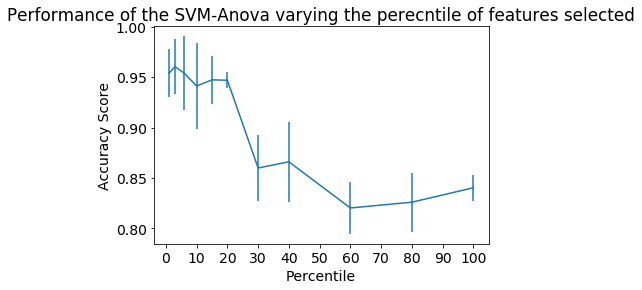

In [91]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


print('how to perform univariate feature selection before runing SVC(support vector classifier)')

X, y = load_iris(return_X_y=True)
# adding in 36 non informative featuers
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))
clf = Pipeline([('anova', SelectPercentile(chi2)),
               ('scaler', StandardScaler()),
               ('svc', SVC(gamma='auto'))])
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80,100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())
    
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the perecntile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

# Selecting dimensionality reduction with Pipeline and GridsearchCV

Automatically created module for IPython interactive environment


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


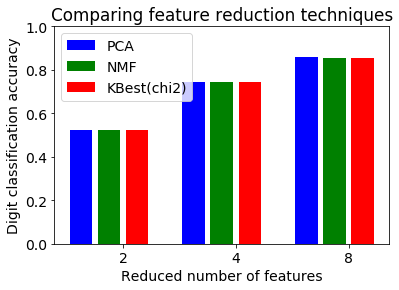

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    # the reduce_dim stage is populated by param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=False, max_iter=10000))
])
N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]

reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
X, y = load_digits(return_X_y=True)
grid.fit(X,y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in order of param_grid iteration, which is alphabetical
mean_scores= mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
              (len(reducer_labels) +1) + .5)
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])
plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()


from joblib import Memory
from shutil import rmtree
# Creating a temporary folder to store the transformers of the pieline

location = 'cachedir'
memory = Memory(location=location, verbose=10)
cached_pipe = Pipeline([('reduce_dim', PCA()),
                       ('classify', LinearSVC(dual=False, max_iter=1000000))],
                      memory=memory)
# a chached pipeline was used wihin the grid search
#Delete the temporary chace beofre exiting

memory.clear(warn=False)
rmtree(location)

